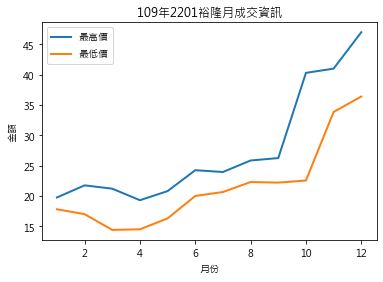

In [2]:
# %load twstock.py
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

month,high,low = [],[],[]
url = 'https://www.twse.com.tw/exchangeReport/FMSRFK?response=html&date=20200101&stockNo=2201'
content = requests.get(url).text
sp = BeautifulSoup(content, "lxml")
datas = sp.select("table")[0]
title=datas.find("div").text.replace(" ","")
rows = datas.select("tbody tr")
for row in rows:
    cols = row.select("td")
    month.append(int(cols[1].text))  #月份
    high.append(float(cols[2].text)) #最高價
    low.append(float(cols[3].text))  #最低價
    
plt.plot(month, high, linewidth=2.0,label="最高價")
plt.plot(month, low, linewidth=2.0,label="最低價")
plt.legend()
plt.title(title) #圖表標題
plt.xlabel("月份")
plt.ylabel("金額")
plt.rcParams["font.sans-serif"] = "Microsoft JhengHei" #也可設mingliu或DFKai-SB
plt.show()